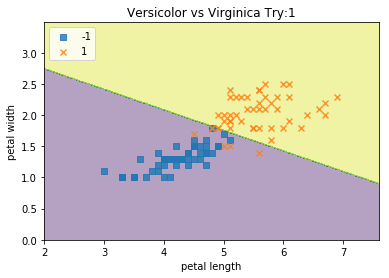

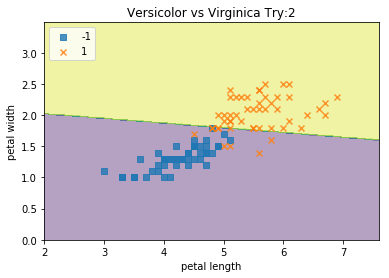

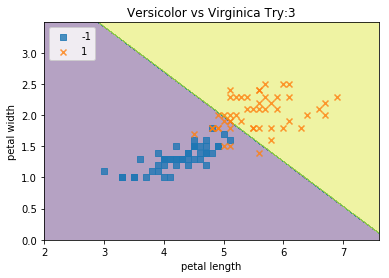

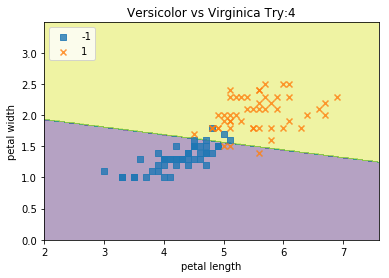

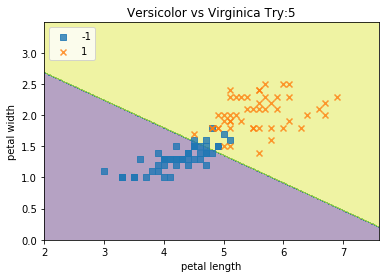

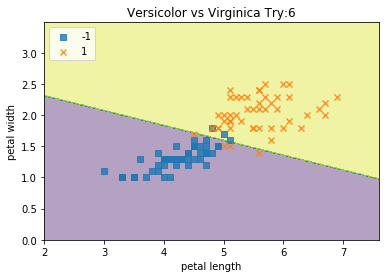

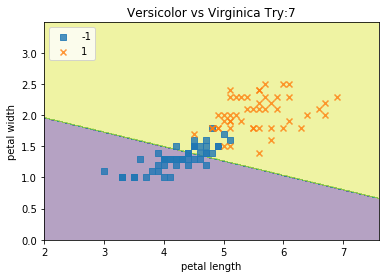

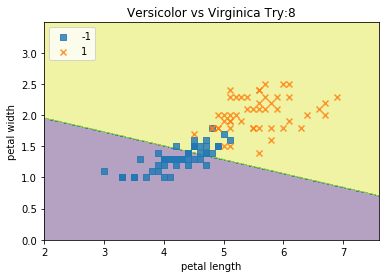

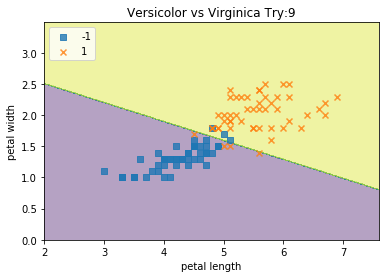

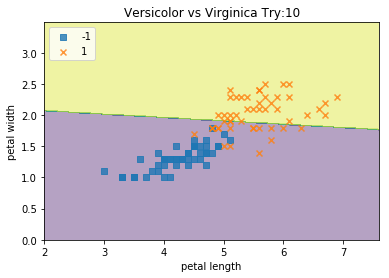

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
from perceptron import Perceptron
from matplotlib.colors import ListedColormap
def plot_decision_regions(X,y,classifier,resolution=0.01):
    #setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('green','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min,x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min,x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1 , xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution), np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmpa=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.xlim(xx2.min(),xx2.max())
    #plot class samples
    for idx , cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y == cl,1],alpha=0.8,  marker=markers[idx],label=cl)

df = pd.read_csv("IrisData.csv")
df_filtered = df[df.iloc[0:,4].isin(["'versicolor'","'virginica'"])]
totalppn = Perceptron(eta=0.01,n_iter=10) 
totalppn.w_ = np.zeros(3)
for i in range(10):

        df_shuffled = df_filtered.sample(frac=1)
        #print(df_shuffled)
        #df.tail()
        y = df_shuffled.iloc[0:,4].values
        #print(y)
        y = np.where(y == "'versicolor'", -1 ,1)
        #print (y)
        X = df_shuffled.iloc[0:, [2,3]].values
        #print(X)
        '''
        plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
        plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
        plt.xlabel('sepal length')
        plt.ylabel('petal length')
        plt.legend(loc='upper left')
        plt.show()
        #time.sleep(5)
        '''
        ppn=Perceptron(eta=0.01,n_iter=100)
        ppn.fit(X,y)
        #print(ppn.errors_)
        totalppn.w_ += ppn.w_
        '''
        plt.plot(range(1,len(ppn.errors_) + 1),ppn.errors_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('# of Misclassifications')
        plt.title('Versicolor vs Virginica Error List')
        plt.show()
        '''
        #appn=train(nr_iter=10,examples=zip(X,y))

        #time.sleep(5)
        plot_decision_regions(X,y,classifier=ppn)
        plt.xlabel('petal length')
        plt.ylabel('petal width')
        plt.legend(loc = 'upper left')
        plt.title('Versicolor vs Virginica Try:%s'%(i+1))
        plt.xlim(2,7.6)
        plt.show()



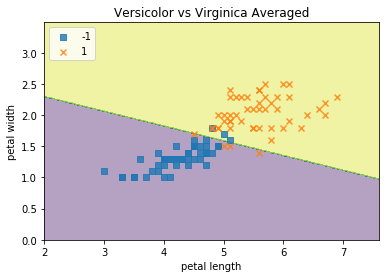

In [5]:
plot_decision_regions(X,y,classifier=totalppn)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.title('Versicolor vs Virginica Averaged')
plt.xlim(2,7.6)
plt.show()

